In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from csv import writer
import json
import time
import glob
import os
from pathlib import Path
import sys
from scipy.interpolate import make_interp_spline

In [4]:
p = str(Path.cwd()) + "/NewGSData"
files = sorted(glob.glob(os.path.join(p,"*")))

# for f in files:
#     print(os.path.basename(f).split('/')[0])
Days = []
for f in files:
    # print(os.path.basename(f).split('/')[0])
    gsnd = os.path.basename(f).split('/')[-1][2:]
    Days.append(gsnd)

In [146]:
words = ['gun', 'weapon', 'arms', 'military', "equipment", "army", "soldier", "troop"]
y = []

need = "Add Title" + "need"
for f in files:
    count = 0
    df2 = pd.read_csv(f,encoding='utf-8')
    df2 = df2.drop_duplicates(subset="text")
    size = len(df2)
    # size = 1
    for word in  words:
        count += df2["text"].str.contains(word, case = False).sum()
    # count = df2["text"].str.contains("need", case = False).sum()
    # print(count)
    y.append(count/size)

print(len(Days))
print(len(y))

222
222


In [50]:
unlabeledDays = []
for i in range(222):
    unlabeledDays.append(i)
print(len(unlabeledDays))

222


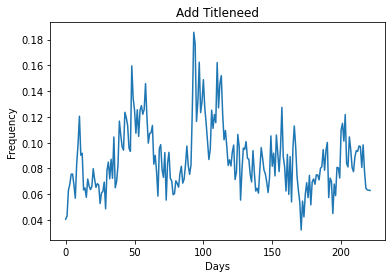

In [147]:
# smoothing data
x_ = unlabeledDays
y_ = y
# comment out to smooth data
# X_Y_Spline = make_interp_spline(unlabeledDays, y)
# x_ = np.linspace(x_.min(), x_.max(), 40)
# y_ = X_Y_Spline(x_)
plt.plot(x_, y_)
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.title(need)
plt.show()

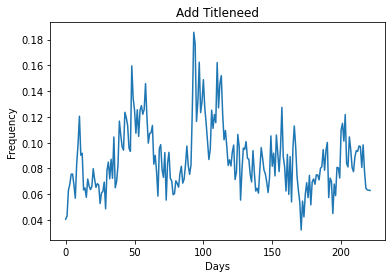

In [148]:
dfmilitary = pd.DataFrame({"Days":x_, "val":y_})
# dfmilitary
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.title(need)
# plt.ylim(.9, 1.1)
plt.plot(dfmilitary.Days, dfmilitary.val)

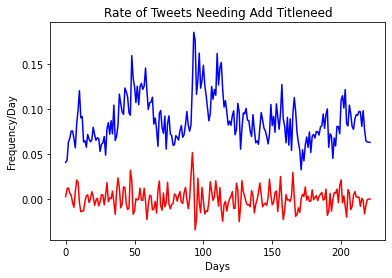

In [118]:
# gets gradient/derivative and plots both og data and gradient
dfmilitary['gradient'] = np.gradient(dfmilitary.val.values)
# dfmilitary
plt.xlabel("Days")
plt.ylabel("Frequency/Day")
plt.title("Rate of Tweets Needing " + need)
plt.plot(dfmilitary.Days, dfmilitary.val, 'b')
plt.plot(dfmilitary.Days ,dfmilitary.gradient, 'r')

In [174]:
words = ["help", "support", "aid", "assistance"]
y = []

need = "Add Title " + words[0]
for f in files:
    count = 0
    df2 = pd.read_csv(f,encoding='utf-8')
    df2 = df2.drop_duplicates(subset="text")
    size = len(df2)
    # size = 1
    for word in  words:
        count += df2["text"].str.contains(word, case = False).sum()
    # count = df2["text"].str.contains("need", case = False).sum()
    # print(count)
    y.append(count/size)

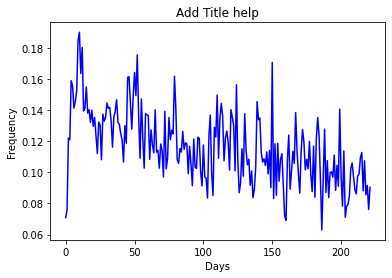

In [177]:
y_ = y

dfhelp = pd.DataFrame({"Days":x_, "val":y_})
dfhelp['gradient'] = np.gradient(dfhelp.val.values)

# w = 25
# smooth = np.convolve(y_, np.ones(w), 'valid') / w
# smooth_x = x_[w//2:-w//2+1]

# plt.figure(figsize=(20, 6))
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.title(need)

# thing = np.array(dfhelp.Days)
# thing
plt.plot(dfhelp.Days, dfhelp.val, 'b')
# plt.hist(dfhelp.val,bins=dfhelp.Days,density=False)
# dfhelp['val'].plot(kind='bar', width=.9)
# plt.plot(dfmilitary.Days, dfmilitary.val, 'r')


# plt.plot(dfhelp.Days ,dfhelp.gradient, 'r')

In [241]:
helpwords = ["help", "support", "aid", "assistance", "peace", "relief", "unity", "fund", "safe", "union"]
militarywords = ['gun', 'weapon', 'arms', 'military', "equipment", "army", "soldier", "troop" , "defence",
"artillery", "firepower", "protection", "missle", "fighter", "assualt", "aircraft", "destruction", "resist",
"enemy", "tank", "security", "strategy"]
otherwords =["family", "medicine", "water", "emergency", "medical", "mental", "supply" , "charities", "stocks", "food",
"shelter", "cloth", "health", "supplies", "meal", "donor"]

helpy =[]
militaryy = []
othery = []
y = []

# need = "Add Title " + words[0]
for f in files:
    count = 0
    helpcount = 0
    militarycount = 0
    othercount = 0
    df2 = pd.read_csv(f,encoding='utf-8')
    df2 = df2.drop_duplicates(subset="text")
    size = len(df2)
    # size = 1
    count = len(df2)
    for word in helpwords:
        helpcount += df2["text"].str.contains(word, case = False).sum()
    for word in militarywords:
        militarycount += df2["text"].str.contains(word, case = False).sum() 
    for word in otherwords:
        othercount += df2["text"].str.contains(word, case = False).sum()
    # for wo
    # count = df2["text"].str.contains("need", case = False).sum()
    # print(count)

    othery.append(othercount/size)
    militaryy.append(militarycount/size)
    helpy.append(helpcount/size)
    y.append(count/size)

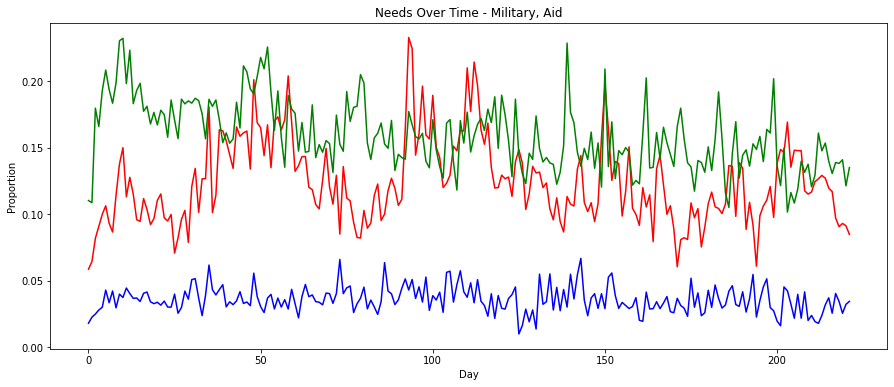

In [242]:
# plt.plot(x_, y, 'b')
plt.figure(figsize=(15, 6))
plt.title("Needs Over Time - Military, Aid")
plt.xlabel("Day")
plt.ylabel("Proportion")
plt.plot(x_,militaryy, 'r')
plt.plot(x_, helpy, 'g')
plt.plot(x_, othery, 'b')


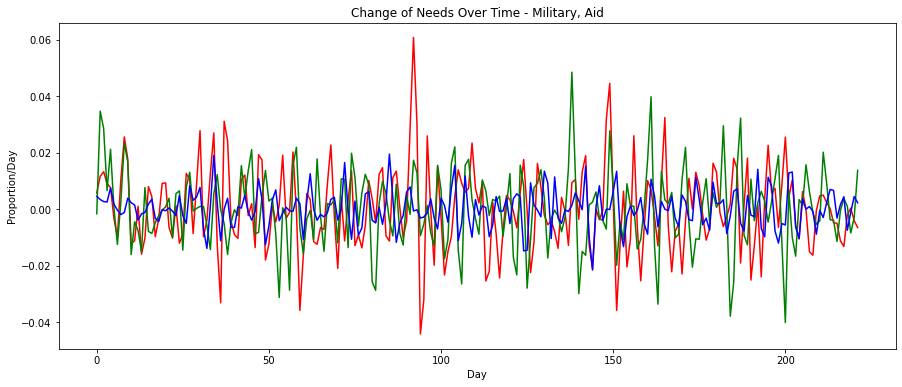

In [243]:
plt.figure(figsize=(15, 6))
plt.title("Change of Needs Over Time - Military, Aid")
plt.xlabel("Day")
plt.ylabel("Proportion/Day")
plt.plot(x_, np.gradient(militaryy), 'r' )
plt.plot(x_, np.gradient(helpy), 'g' )
plt.plot(x_, np.gradient(othery), 'b')

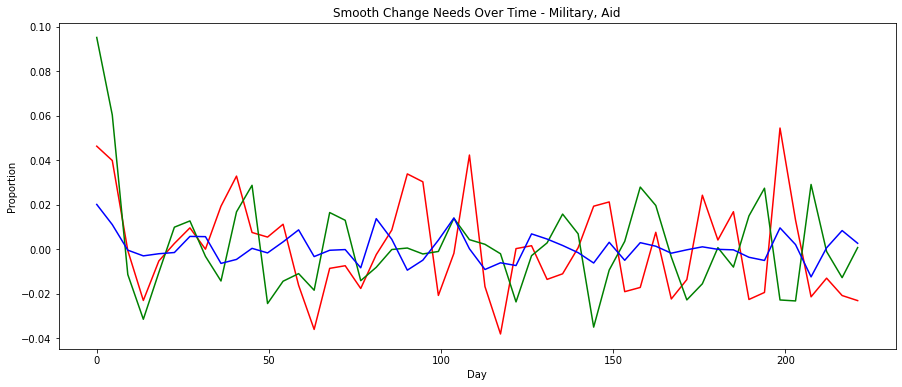

In [246]:
X_Y_Spline_military = make_interp_spline(x_, militaryy)
# npx = np.array(x_)
new_x = np.linspace(0, 221, 50)
intmilitaryy = X_Y_Spline_military(new_x)

X_Y_Spline_help = make_interp_spline(x_, helpy)
inthelpy = X_Y_Spline_help(new_x)

X_Y_Spline_other = make_interp_spline(x_, othery)
intothery = X_Y_Spline_other(new_x)

plt.figure(figsize=(15, 6))
plt.title("Smooth Change Needs Over Time - Military, Aid")
plt.xlabel("Day")
plt.ylabel("Proportion")
plt.plot(new_x, np.gradient(intmilitaryy), 'r' )
plt.plot(new_x, np.gradient(inthelpy), 'g' )
plt.plot(new_x, np.gradient(intothery), 'b' )


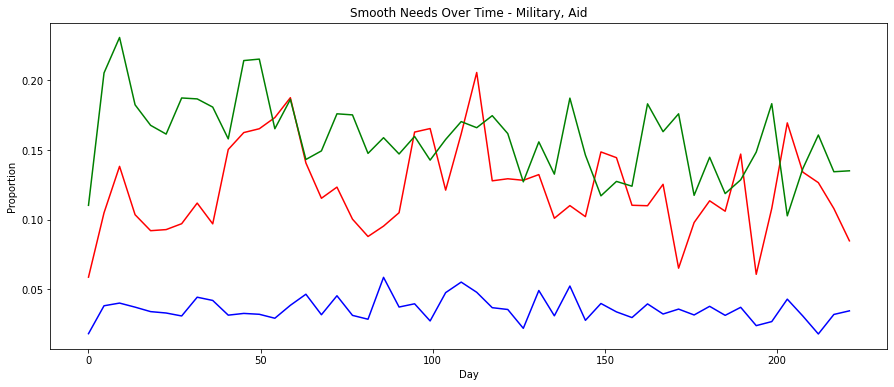

In [247]:
plt.figure(figsize=(15, 6))
plt.title("Smooth Needs Over Time - Military, Aid")
plt.xlabel("Day")
plt.ylabel("Proportion")
plt.plot(new_x, intmilitaryy, 'r' )
plt.plot(new_x, inthelpy, 'g' )
plt.plot(new_x, intothery, 'b' )